In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Data has been found from Kaggle
# https://www.kaggle.com/datasnaek/youtube-new

# YouTube video like prediction

In [71]:
DATABASE_FOLDER = os.path.join('datasets', 'youtube')
US_VIDEOS = os.path.join(DATABASE_FOLDER, 'USvideos.csv')

data = pd.read_csv(US_VIDEOS, parse_dates=['trending_date', 'publish_time'])
data.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [72]:
data = data.drop(['description', 'thumbnail_link', 'title', 'tags', 'channel_title', 'video_id'], axis=1)
data.head()


,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,17.14.11,22,2017-11-13 17:13:01+00:00,748374,57527,2966,15954,False,False,False
1,17.14.11,24,2017-11-13 07:30:00+00:00,2418783,97185,6146,12703,False,False,False
2,17.14.11,23,2017-11-12 19:05:24+00:00,3191434,146033,5339,8181,False,False,False
3,17.14.11,24,2017-11-13 11:00:04+00:00,343168,10172,666,2146,False,False,False
4,17.14.11,24,2017-11-12 18:01:41+00:00,2095731,132235,1989,17518,False,False,False


array([[<AxesSubplot:title={'center':'category_id'}>,
        <AxesSubplot:title={'center':'publish_time'}>],
       [<AxesSubplot:title={'center':'views'}>,
        <AxesSubplot:title={'center':'likes'}>],
       [<AxesSubplot:title={'center':'dislikes'}>,
        <AxesSubplot:title={'center':'comment_count'}>]], dtype=object)

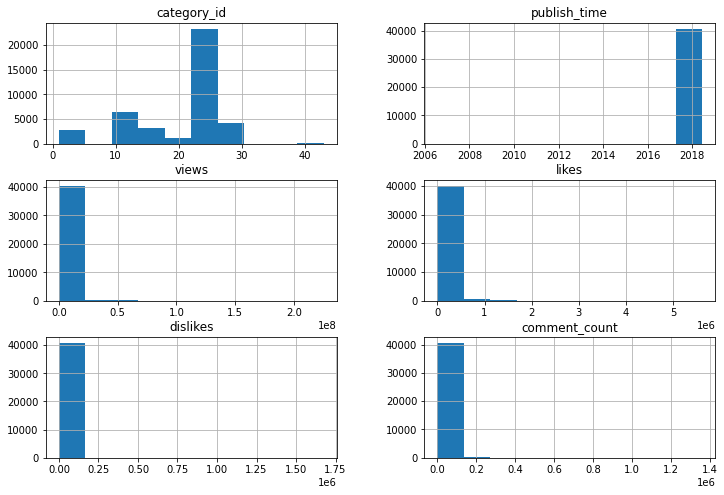

In [73]:
data_analyse = data.copy()

data_analyse.hist(bins=10, figsize=(12, 8))

In [74]:
corr_matrix = data_analyse.corr()
corr_matrix['views'].sort_values(ascending=False)


views                     1.000000
likes                     0.849177
comment_count             0.617621
dislikes                  0.472213
ratings_disabled          0.015355
comments_disabled         0.002677
video_error_or_removed   -0.002256
category_id              -0.168231
Name: views, dtype: float64

array([[<AxesSubplot:xlabel='views', ylabel='views'>,
        <AxesSubplot:xlabel='likes', ylabel='views'>,
        <AxesSubplot:xlabel='comment_count', ylabel='views'>,
        <AxesSubplot:xlabel='category_id', ylabel='views'>],
       [<AxesSubplot:xlabel='views', ylabel='likes'>,
        <AxesSubplot:xlabel='likes', ylabel='likes'>,
        <AxesSubplot:xlabel='comment_count', ylabel='likes'>,
        <AxesSubplot:xlabel='category_id', ylabel='likes'>],
       [<AxesSubplot:xlabel='views', ylabel='comment_count'>,
        <AxesSubplot:xlabel='likes', ylabel='comment_count'>,
        <AxesSubplot:xlabel='comment_count', ylabel='comment_count'>,
        <AxesSubplot:xlabel='category_id', ylabel='comment_count'>],
       [<AxesSubplot:xlabel='views', ylabel='category_id'>,
        <AxesSubplot:xlabel='likes', ylabel='category_id'>,
        <AxesSubplot:xlabel='comment_count', ylabel='category_id'>,
        <AxesSubplot:xlabel='category_id', ylabel='category_id'>]],
      dtype=object)

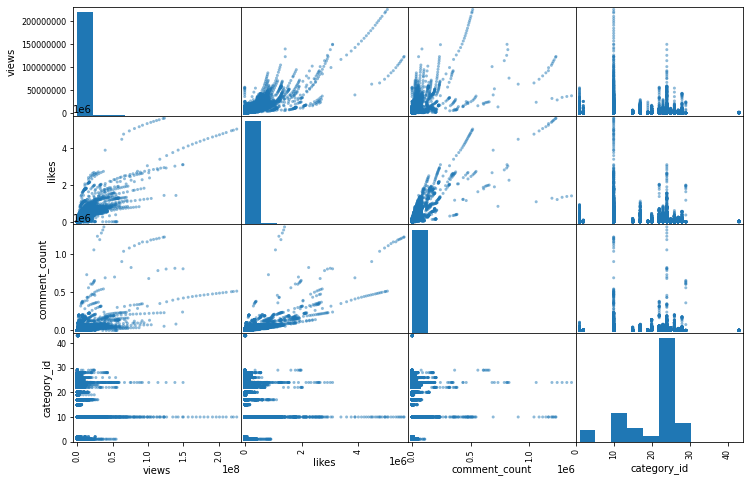

In [75]:
from pandas.plotting import scatter_matrix


corellation_attributes = ['views', 'likes', 'comment_count', 'category_id']
scatter_matrix(data_analyse[corellation_attributes], figsize=(12, 8))

# It can be observed that likes are very correllated to views, comments.
# Some categories have definitively more success than others

In [76]:
# The difference between the publish time and the trending_date may also be interesting

data_analyse['trending_date'] = pd.to_datetime(data_analyse['trending_date'], format='%y.%d.%m')

data_analyse['publish_time'] = data_analyse['publish_time'].dt.date
data_analyse['trending_date'] = data_analyse['trending_date'].dt.date

data_analyse['trending_difference'] = (data_analyse['trending_date'] - data_analyse['publish_time']).dt.days

In [97]:
# No apparent linear corellation with the trending_difference

likes                     1.000000
views                     0.849177
comment_count             0.803057
dislikes                  0.447186
video_error_or_removed   -0.002641
trending_difference      -0.017650
ratings_disabled         -0.020888
comments_disabled        -0.028918
category_id              -0.173921
Name: likes, dtype: float64

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


num_attributes = list(data_analyse.drop('category_id'))
cat_attributes = ['category_id']

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),  # Must be transformer (fit_transform must be defined)
    ('std_scaler', StandardScaler())  # Doesn't have to be a transformer
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attributes)
    ('cat', OneHotEncoder(), cat_attributes)
])

data = data_analyse.copy()

data['trending_date'] = pd.to_datetime(data['trending_date'], format='%y.%d.%m')
data['trending_difference'] = (data['trending_date'].dt.date - data['publish_time'].dt.date).dt.days

data_analyse['publish_time'] = data_analyse['publish_time'].dt.days
data_analyse['trending_date'] = data_analyse['trending_date'].dt.days

data.describe()


<>:16: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
<>:16: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?


KeyError: "['category_id'] not found in axis"